# Multiple Linear Regression


## Importing the necessary Libraries and Packages


In [1]:
from sklearn.model_selection import train_test_split # splitting the dataset
from sklearn.linear_model import LinearRegression # regression algorithm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error # accuracy metric
import numpy as np # data processing
import pandas as pd # data processing 
import matplotlib.pyplot as plt # data plotting

## Importing the csv file as a DataFrame


In [2]:
df = pd.read_csv("Dataset/Startups.csv")
df.head()

,Research,Marketing,Profit
0,165349.20,401784.10,192261.83
1,162597.70,373898.53,191792.06
2,153441.51,357934.54,191050.39
3,144372.41,323199.62,182901.99
4,142107.34,300168.42,166187.94


## Exploratory Data Analysis


Formal information about the dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Research   44 non-null     float64
 1   Marketing  44 non-null     float64
 2   Profit     44 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


Description of the dataset


In [4]:
df.describe()

,Research,Marketing,Profit
count,44.000000,44.000000,44.000000
mean,81745.530455,177546.896364,119784.630227
std,41341.933344,90204.226315,34297.025963
min,15505.730000,28334.720000,65200.330000
25%,53226.980000,114425.525000,96762.390000
50%,75791.365000,168043.995000,109543.120000
75%,115878.517500,222098.650000,144725.037500
max,165349.200000,401784.100000,192261.830000


Checking if any null value exists


In [5]:
df.isnull().sum()

Research     0
Marketing    0
Profit       0
dtype: int64

Columns of the dataset


In [6]:
df.columns

Index(['Research', 'Marketing', 'Profit'], dtype='object')

Correlations between the variables


In [7]:
df.corr()

,Research,Marketing,Profit
Research,1.000000,0.973596,0.975669
Marketing,0.973596,1.000000,0.990908
Profit,0.975669,0.990908,1.000000


## Now taking 2 parts from the dataset:

### X : which contains all the data except the <b>Profit</b> column<br>y : which contains only the <b>Profit</b> column


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Visualisation of the Data


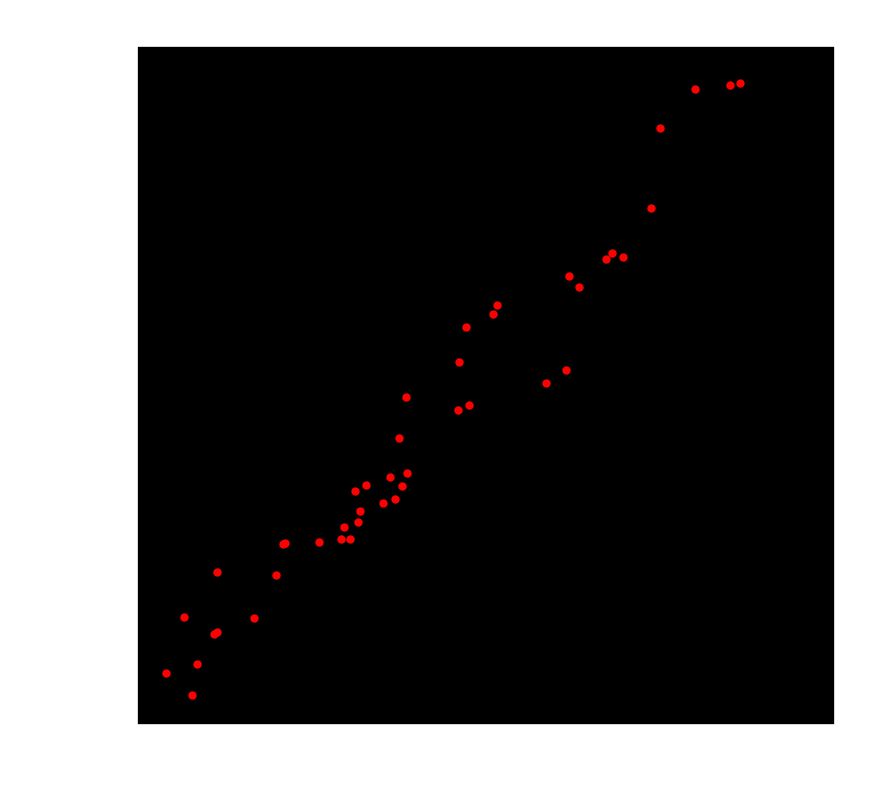

In [9]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Research = df["Research"]
Profit = df["Profit"]
plt.scatter(Research, Profit, marker=".", color="red")
plt.xticks(np.arange(15000, 200000, 25000))
plt.yticks(np.arange(60000, 220000, 20000))
plt.title("Research vs Profit")
plt.xlabel("Research")
plt.ylabel("Profit")
plt.savefig("Images/Research_vs_Profit.png",bbox_inches='tight')

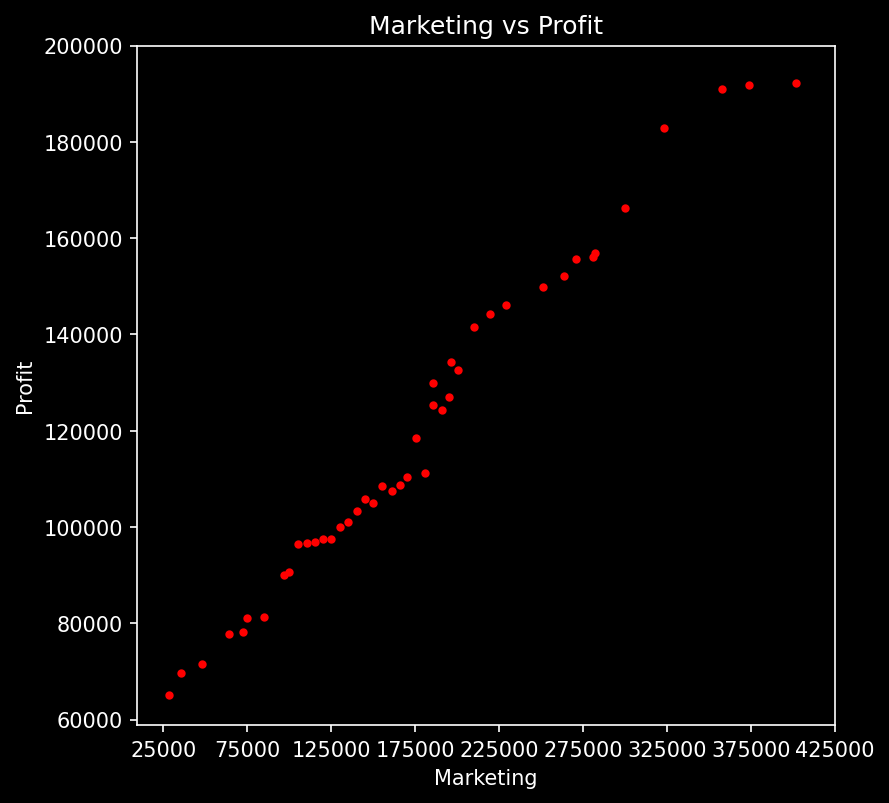

In [10]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Marketing = df["Marketing"]
Profit = df["Profit"]
plt.scatter(Marketing, Profit, marker=".", color="red")
plt.xticks(np.arange(25000, 475000, 50000))
plt.yticks(np.arange(60000, 220000, 20000))
plt.title("Marketing vs Profit")
plt.xlabel("Marketing")
plt.ylabel("Profit")
plt.savefig("Images/Marketing_vs_Profit.png",bbox_inches='tight')

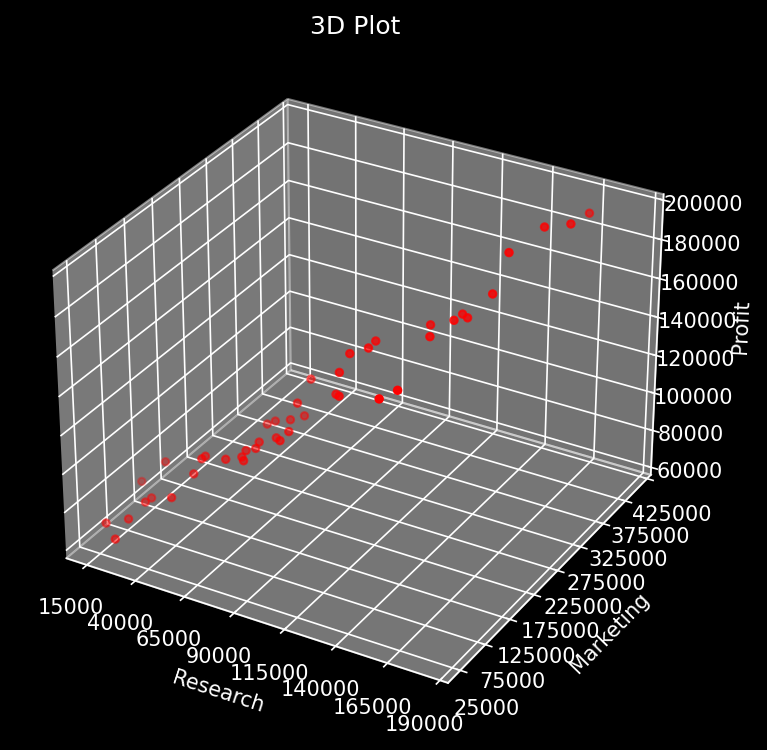

In [11]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
ax = plt.axes(projection ='3d') # syntax for 3-D projection
ax.scatter3D(Research, Marketing, Profit, marker=".", color="red", s=50)
ax.set_xticks(np.arange(15000, 200000, 25000))
ax.set_yticks(np.arange(25000, 475000, 50000))
ax.set_zticks(np.arange(60000, 220000, 20000))
ax.set_xlabel("Research")
ax.set_ylabel("Marketing")
ax.set_zlabel("Profit")
ax.set_title("3D Plot")
plt.savefig("Images/3D_Plot.png",bbox_inches='tight')

## Split the X and y dataframes for test and training


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

## Implementation of the Model


In [13]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

## Performance of the Model


In [14]:
# Printing the coefficient of determination of the regression
print("The coefficient of determination :", r2_score(y_test,y_pred))
adjusted_r2_score = 1 - (1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("The adjusted coefficient of determination :", adjusted_r2_score)

The coefficient of determination : 0.9806397350397471
The adjusted coefficient of determination : 0.9774130242130383


## Plotting the Regression


### Training Dataset


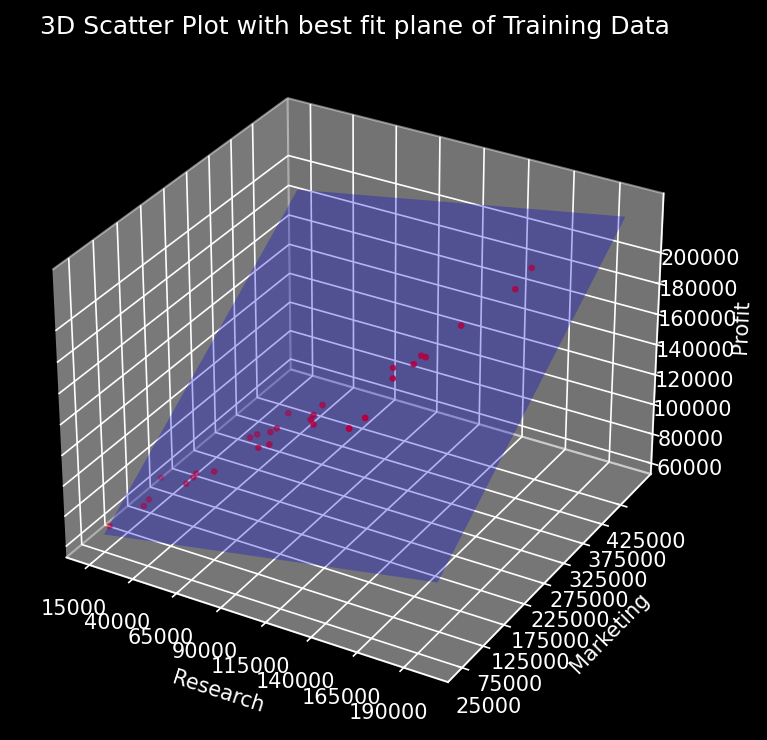

In [15]:
g=[];h=[]
for i in range(len(X_train)):
    g.append(X_train[i][0])
    h.append(X_train[i][1])
r=reg.predict(X_train).tolist()
x2=[g[i]**2 for i in range(len(g))] #squaring x values
y2=[h[i]**2 for i in range(len(h))] #squaring y values
xy=[g[i]*h[i] for i in range(len(g))] #multiplying x and y values
xz=[g[i]*r[i] for i in range(len(g))] #multiplying x and z values
yz=[h[i]*r[i] for i in range(len(h))] #multiplying y and z values
xx=sum(g) #sum of x values
Y=sum(h) #sum of y values
Z=sum(r) #sum of z values
XY=sum(xy) #sum of xy values
XZ=sum(xz) #sum of xz values
YZ=sum(yz) #sum of yz values
X2=sum(x2) #sum of x2 values
Y2=sum(y2) #sum of y2 values
n=len(g) #number of values
A=[[n,xx,Y],[xx,X2,XY],[Y,XY,Y2]] #matrix A
B=[Z,XZ,YZ] #matrix B
A_inv = np.linalg.inv(A) #inverse of A
ans = np.matmul(A_inv,B) #multiplying A inverse and B
a=ans[0] #a value
b=ans[1] #b value
c=ans[2] #c value
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background') #changing the background color
ax = plt.axes(projection ='3d') # syntax for 3-D projection
ax.scatter(g,h,r,marker=".", color="red") #plotting points
ax.set_xticks(np.arange(15000, 200000, 25000))
ax.set_yticks(np.arange(25000, 475000, 50000))
ax.set_zticks(np.arange(60000,220000,20000))
ax.set_xlabel('Research')
ax.set_ylabel('Marketing')
ax.set_zlabel('Profit')
plt.title('3D Scatter Plot with best fit plane of Training Data')
p=np.linspace(15000,200000,100) #creating a list of 100 values
q=np.linspace(25000,475000,100) #creating a list of 100 values
p,q = np.meshgrid(p,q) #creating a meshgrid
eq = a+b*p+c*q #equation of plane
ax.plot_surface(p, q, eq, alpha=0.3,color="blue") #plotting plane
plt.savefig("Images/3D_Plot_Training_Data.png",bbox_inches='tight')

### Test Dataset


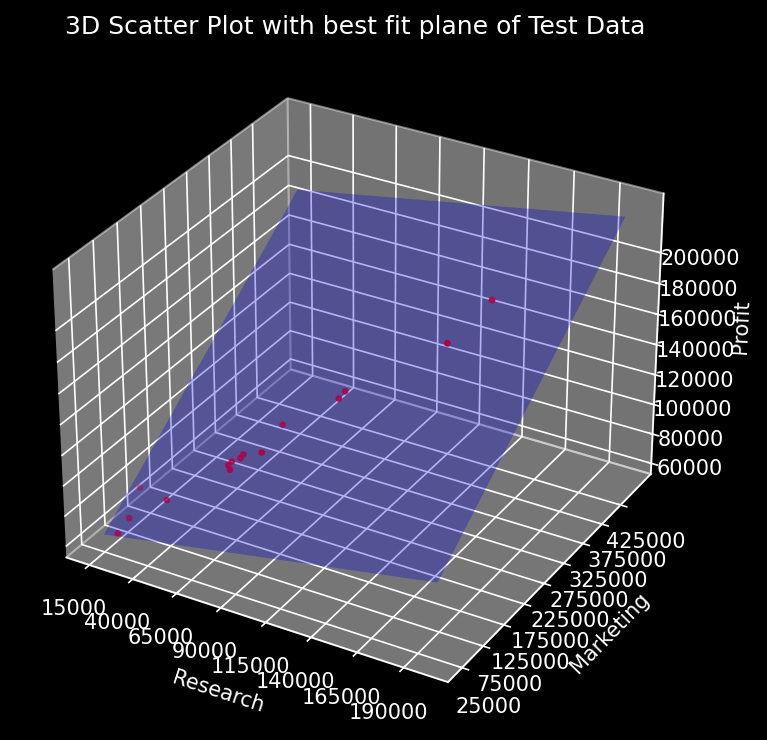

In [16]:
k=[];l=[]
for i in range(len(X_test)):
    k.append(X_test[i][0])
    l.append(X_test[i][1])
s=reg.predict(X_test).tolist()
x2=[k[i]**2 for i in range(len(k))] #squaring x values
y2=[l[i]**2 for i in range(len(l))] #squaring y values
xy=[k[i]*l[i] for i in range(len(k))] #multiplying x and y values
xz=[k[i]*s[i] for i in range(len(k))] #multiplying x and z values
yz=[l[i]*s[i] for i in range(len(l))] #multiplying y and z values
xx=sum(k) #sum of x values
Y=sum(l) #sum of y values
Z=sum(s) #sum of z values
XY=sum(xy) #sum of xy values
XZ=sum(xz) #sum of xz values
YZ=sum(yz) #sum of yz values
X2=sum(x2) #sum of x2 values
Y2=sum(y2) #sum of y2 values
n=len(k) #number of values
A=[[n,xx,Y],[xx,X2,XY],[Y,XY,Y2]] #matrix A
B=[Z,XZ,YZ] #matrix B
A_inv = np.linalg.inv(A) #inverse of A
ans = np.matmul(A_inv,B) #multiplying A inverse and B
a=ans[0] #a value
b=ans[1] #b value
c=ans[2] #c value
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background') #changing the background color
ax = plt.axes(projection ='3d') # syntax for 3-D projection
ax.scatter(k,l,s,marker=".", color="red") #plotting points
ax.set_xticks(np.arange(15000, 200000, 25000))
ax.set_yticks(np.arange(25000, 475000, 50000))
ax.set_zticks(np.arange(60000,220000,20000))
ax.set_xlabel('Research')
ax.set_ylabel('Marketing')
ax.set_zlabel('Profit')
plt.title('3D Scatter Plot with best fit plane of Test Data')
p=np.linspace(15000,200000,100) #creating a list of 100 values
q=np.linspace(25000,475000,100) #creating a list of 100 values
p,q = np.meshgrid(p,q) #creating a meshgrid
eq = a+b*p+c*q #equation of plane
ax.plot_surface(p, q, eq, alpha=0.3,color="blue") #plotting plane
plt.savefig("Images/3D_Plot_Test_Data.png",bbox_inches='tight')

## Additional Performance Metrics


In [17]:
print('Mean Absolute Error (MAE) :', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE) :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE) :', mean_squared_error(y_test, y_pred, squared=False))
print('Mean Squared Log Error (MSLE) :', mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Log Error (RMSLE) :', mean_squared_log_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE) :', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error (MAE) : 3940.528738121537
Mean Squared Error (MSE) : 23120919.49796699
Root Mean Squared Error (RMSE) : 4808.421726301364
Mean Squared Log Error (MSLE) : 0.0015359146288409055
Root Mean Squared Log Error (RMSLE) : 0.03919074672471686
Mean Absolute Percentage Error (MAPE) : 0.03445709379204582
